# QQ and PP plots

[This Towards Data Science post](https://towardsdatascience.com/explaining-probability-plots-9e5c5d304703) is a solid resource that I based this notebook on. For my reference I prefer to rearrange things a bit. 

[This Quora resource](https://www.quora.com/In-laymans-terms-what-is-the-difference-between-a-P-P-plot-and-a-Q-Q-plot-and-when-would-we-use-one-or-the-other) has an excellent example of how to read Q-Q plots. If you want to go deeper I think that wikipedia is a good start although right below are some key points:
* [P-P Plot](https://en.wikipedia.org/wiki/P%E2%80%93P_plot) - allows comparison of two distributions plotting the two cumulative distribution functions against each other
  * because CDFs are used note that the range is $[0,1]$
  * depending on the distributions in view, a large portion of the distribution (~60%) occurs within a narrow band of the domain, i.e. within +/- one standard deviation from 0. Ultimately, this means that there is a lot of resolution in the middle of the plot and less at the tails
  * per Wikipedia, `The comparison line is the 45° line from (0,0) to (1,1), and the distributions are equal if and only if the plot falls on this line`
* [Q-Q Plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) - allows comparison of two distributions by plotting their quantiles against each other.
* contain more resolution at the tails of the plot due to the large size of the quantiles at the tails. 
* Since analysis usually focuses on the ends/tails, Q-Q plots are more common than P-P plots
* Because Q-Q plots are based on quantiles, you do not have to worry about lining up the data, i.e. what do you do if set $X$ has more data points than set $Y$? 

Be very careful to keep track of which RV maps to the x and y axes of a P-P and Q-Q plot else your results could be incorrectly 'switched'. It is also advisable to carry out other tests of fit to complement these plots. 

In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm
import warnings
#warnings.filterwarnings('ignore')

In [2]:
# define distributions
sample_size = 10000 
rv_standard_normal = np.random.normal(size=sample_size)
rv_normal = np.random.normal(loc=1, scale=2.5, size=sample_size) # normal
#rv_heavy_tailed_normal = np.random.normal(loc=0, scale=2, size=sample_size)
rv_skewed_right_normal = sc.skewnorm.rvs(a=5, size=sample_size)

# define formatting 
%config InlineBackend.figure_format ='retina'
%matplotlib inline
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)

## Recall the PDF and CDF

* [Probability Density Function](https://en.wikipedia.org/wiki/Probability_density_function)
* [Cummulative Distribution Function](https://en.wikipedia.org/wiki/Cumulative_distribution_function)

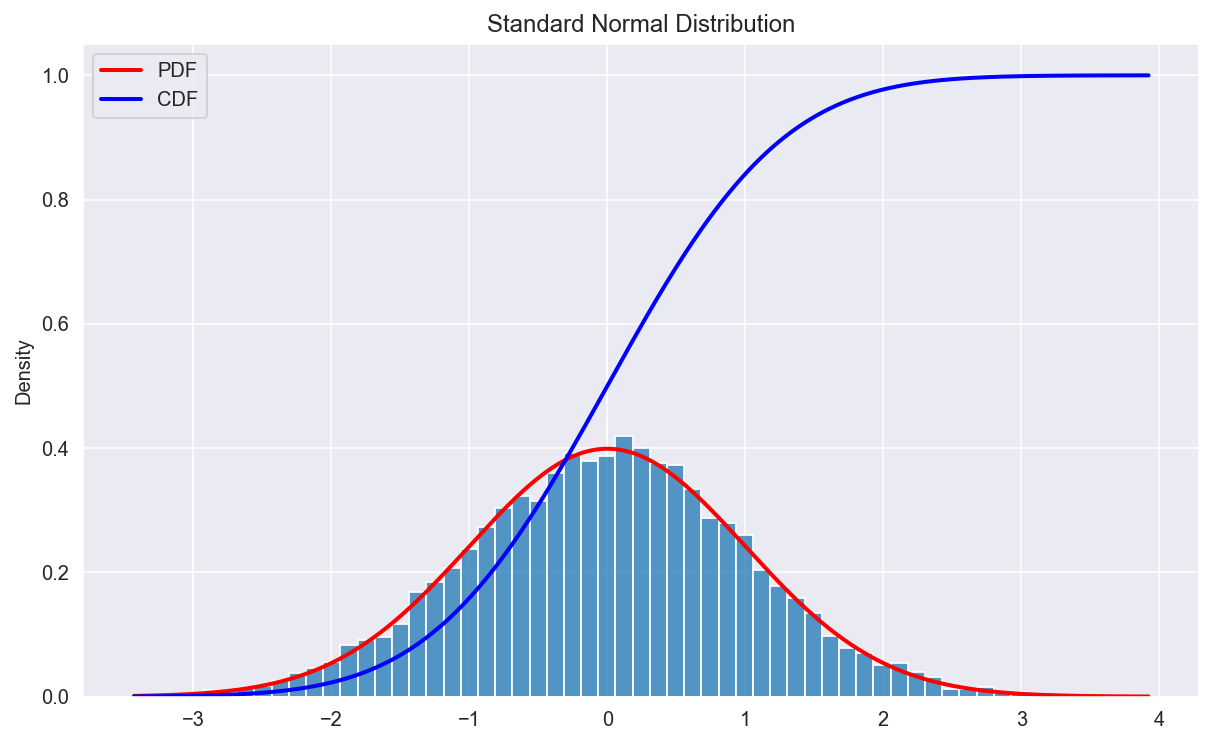

In [3]:
# plot the histogram, PDF and CDF of Standard Normal distribution
ax = sns.histplot(rv_standard_normal, stat="density", kde=False)                                    
rv_range = np.linspace(min(rv_standard_normal), max(rv_standard_normal), num=sample_size)                                                  
std_norm_pdf = sc.norm.pdf(rv_range)           
std_norm_cdf = sc.norm.cdf(rv_range)                                                         

ax.plot(rv_range, std_norm_pdf, 'r', lw=2, label='PDF')
ax.plot(rv_range, std_norm_cdf, 'b', lw=2, label='CDF')

ax.set_title('Standard Normal Distribution')
ax.legend();

## Standard Normal vs. Normal(1,2.5)

Let's compare a Standard Normal N(0,1) vs. a Normal(1,2.5). Note how the location of the Normal has been moved to a $\mu = 1$ and the variance expanded to $\sigma^2=2.5$. Therefore, the N(1,2.5) distribution has been skewed to the right and the tails made fatter. 

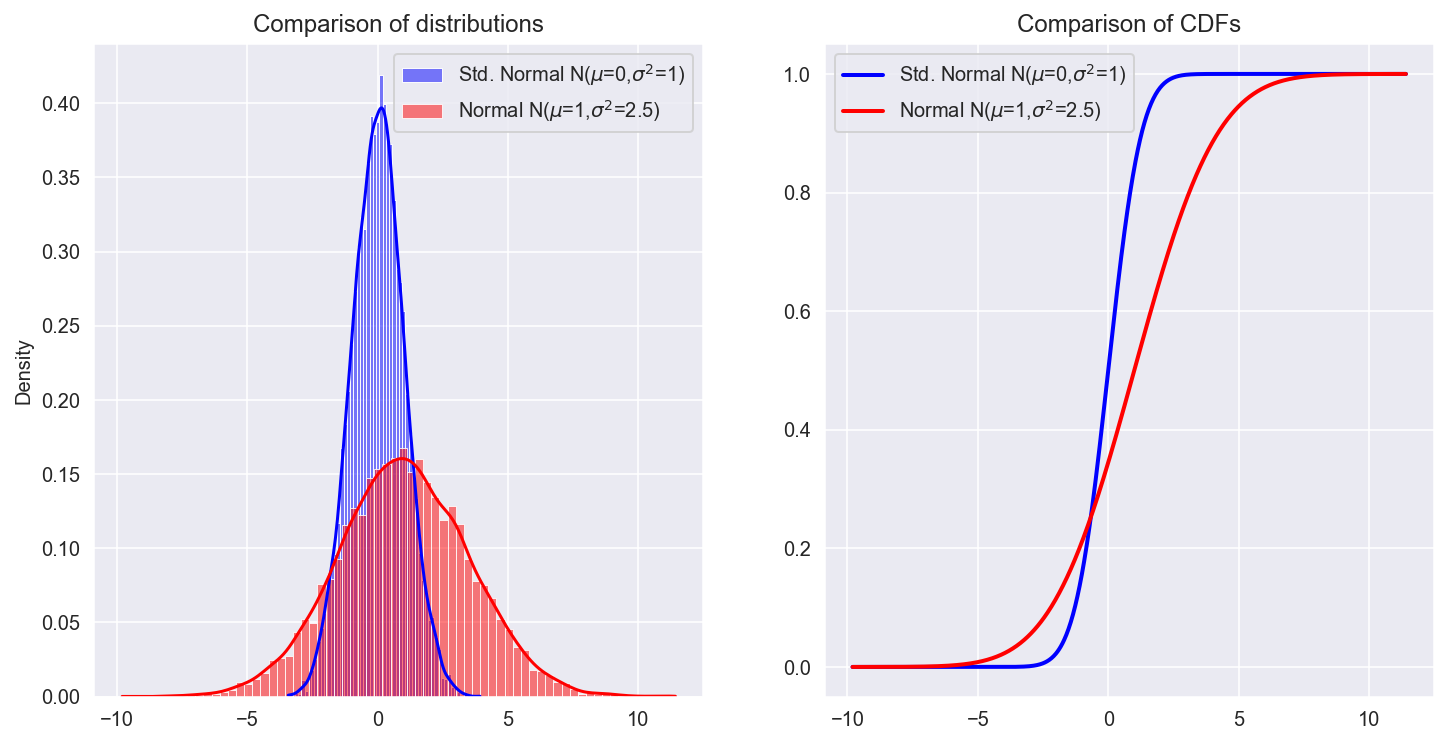

In [4]:
# plots for standard normal and N(1,2.5) distribution
std_normal_lbl= "Std. Normal N($\\mu$=0,$\\sigma^2$=1)"
normal_lbl = "Normal N($\\mu$=1,$\\sigma^2$=2.5)"

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(rv_standard_normal, kde=True, stat="density", color='blue', label=std_normal_lbl, ax=ax1)
sns.histplot(rv_normal, kde=True, stat="density", color='red', label=normal_lbl, ax=ax1)                                    
ax1.set_title("Comparison of distributions")
ax1.legend()
# plot comparison of CDFs
rv_range = np.linspace(min(rv_normal), max(rv_normal), num=1000)                                                  
std_norm_cdf = sc.norm.cdf(rv_range)                                                         
norm_cdf = sc.norm(1, 2.5).cdf(rv_range)                                                         
plt.plot(rv_range, std_norm_cdf, 'blue', lw=2, label=std_normal_lbl)
plt.plot(rv_range, norm_cdf, 'red', lw=2, label=normal_lbl)
ax2.set_title('Comparison of CDFs')
ax2.legend();

Now let's compare the P-P and Q-Q plots. The stack overflow posting mentioned earlier has an excellent explanation but to read the Q-Q plot you have to know that the first parameter is the x-axis (dependent variable) and the second one is the y-axis the indexpendent variable. To the left of the graph, if the blue curve lies below the 45% sloping line that means that the x paremeter distribution has fatter left tails (the data is stretched further to the left tail). Likewise, if the curve to the right of the grapgh lies above(below) the 45% sloping line then the x parameter distribution has fatter(thinner) tails. 

Text(0.5, 1.0, 'Q-Q Plot')

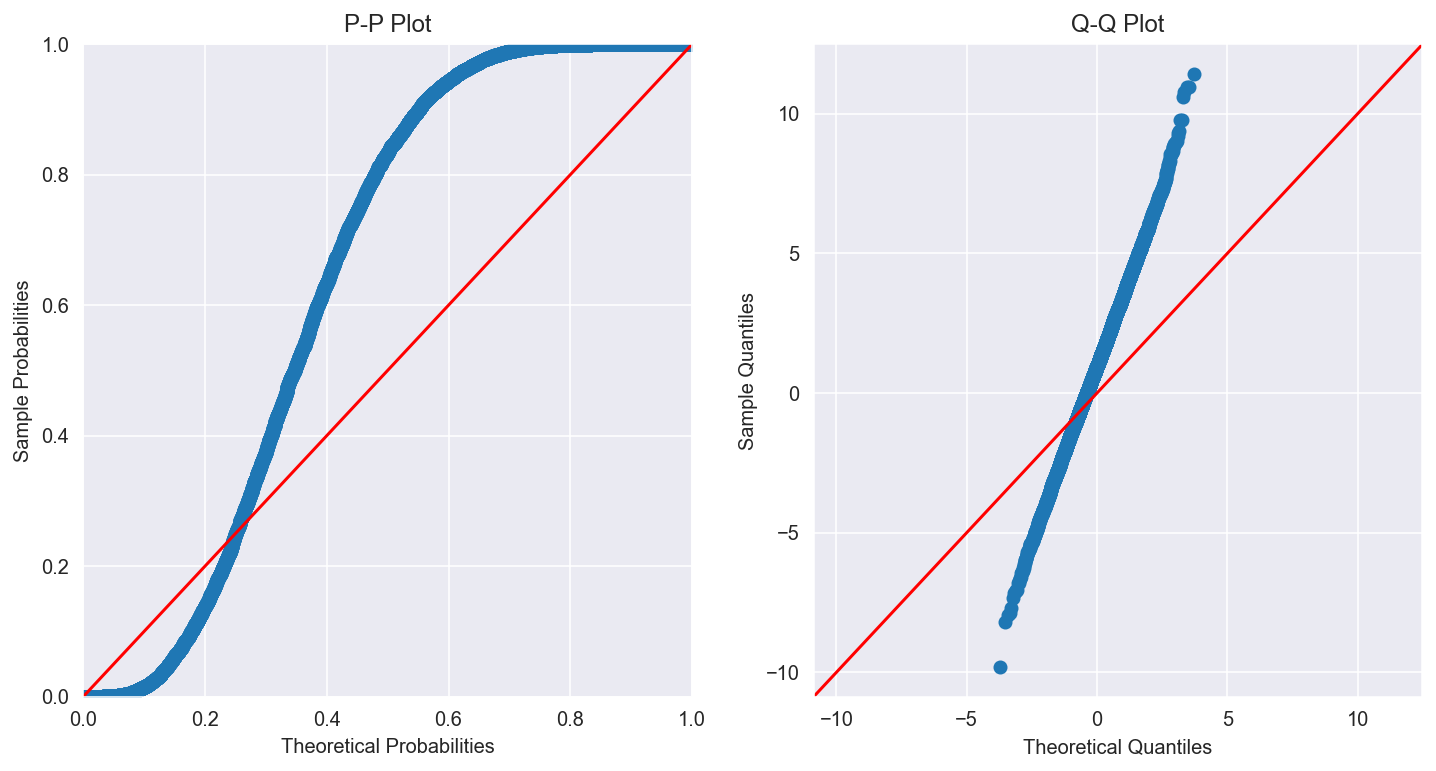

In [5]:
# plots for standard normal and N(1,2.5) distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sm.ProbPlot(rv_normal, sc.norm(loc=0, scale=1)).ppplot(line='45', ax=ax1)
ax1.set_title("P-P Plot")
sm.ProbPlot(rv_normal, sc.norm(loc=0, scale=1)).qqplot(line='45', ax=ax2);
ax2.set_title("Q-Q Plot")

## Standard Normal vs. Right skewed 

The distribution as well as the CDF graphs give a clear indication of the difference between both RVs. 

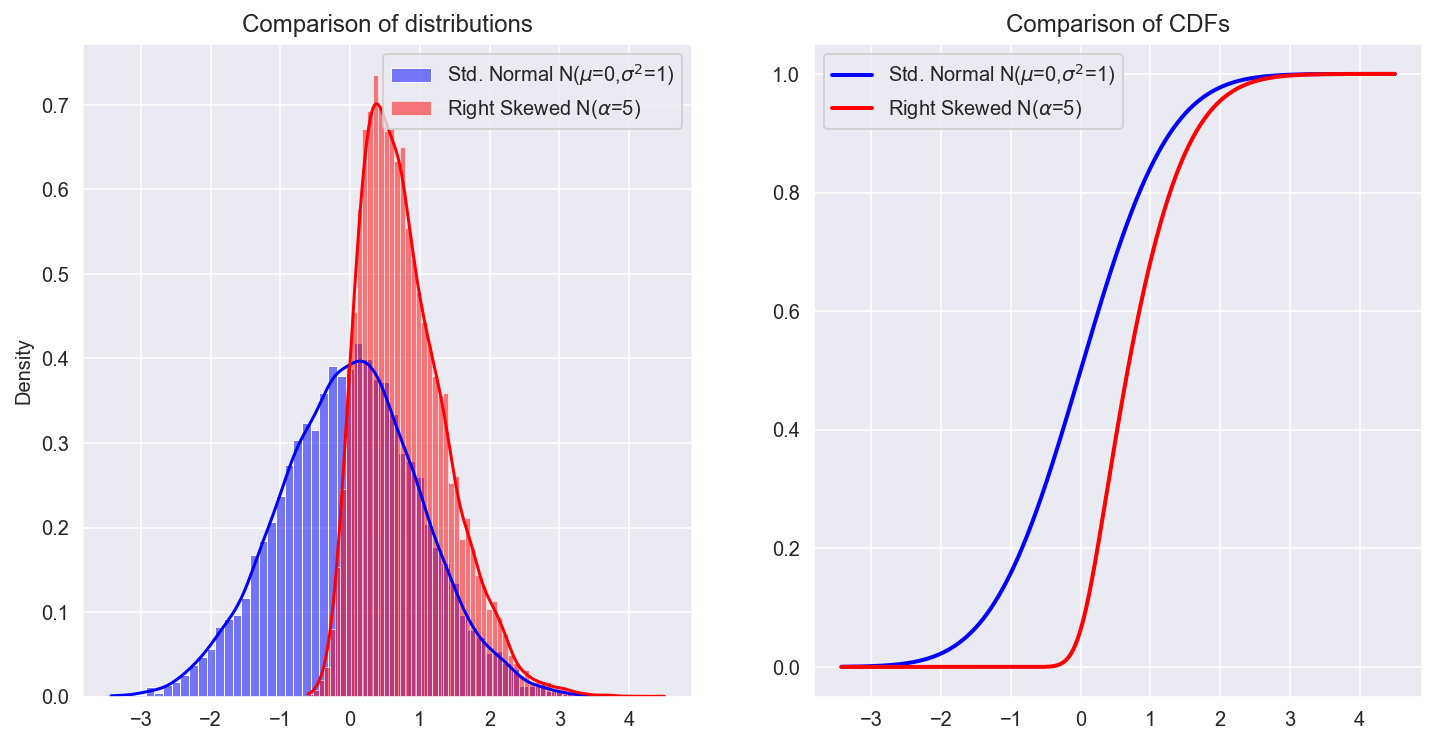

In [6]:
# plots for standard normal and N(1,2.5) distribution
std_normal_lbl= "Std. Normal N($\\mu$=0,$\\sigma^2$=1)"
normal_right_lbl = "Right Skewed N($\\alpha$=5)"

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(rv_standard_normal, kde=True, stat="density", color='blue', label=std_normal_lbl, ax=ax1)
sns.histplot(rv_skewed_right_normal, kde=True, stat="density", color='red', label=normal_right_lbl, ax=ax1)                                    
ax1.set_title("Comparison of distributions")
ax1.legend()
# plot comparison of CDFs
rv_range = np.linspace(min(rv_standard_normal), max(rv_skewed_right_normal), num=1000)                                                  
std_norm_cdf = sc.norm.cdf(rv_range)     
skewed_cdf = sc.skewnorm(a=5).cdf(rv_range)                                                         
plt.plot(rv_range, std_norm_cdf, 'blue', lw=2, label=std_normal_lbl)
plt.plot(rv_range, skewed_cdf, 'red', lw=2, label=normal_right_lbl)
ax2.set_title('Comparison of CDFs')
ax2.legend();

Text(0.5, 1.0, 'Q-Q Plot')

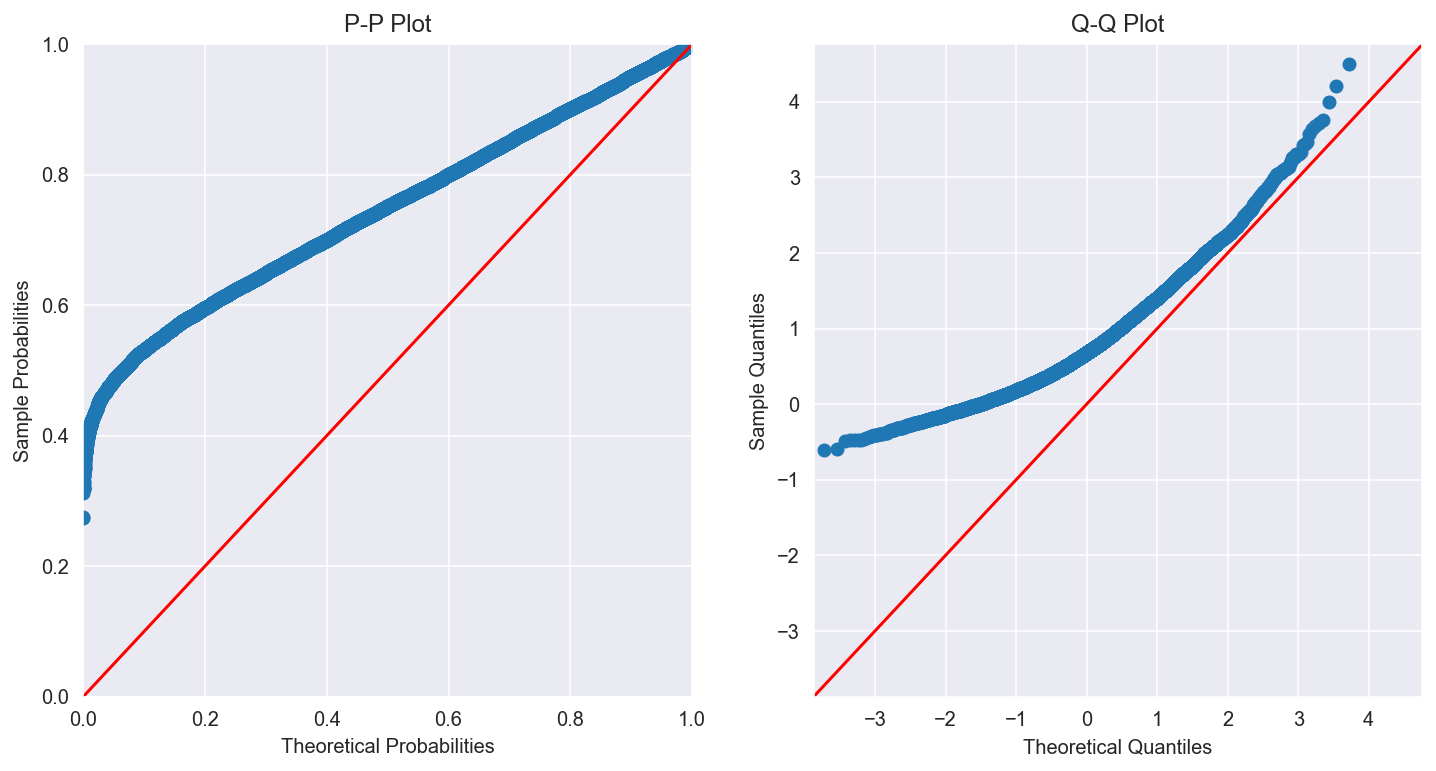

In [7]:
# P-P and Q-Q Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sm.ProbPlot(rv_skewed_right_normal, sc.norm(loc=0, scale=1)).ppplot(line='45', ax=ax1)
ax1.set_title("P-P Plot")
sm.ProbPlot(rv_skewed_right_normal, sc.norm(loc=0, scale=1)).qqplot(line='45', ax=ax2);
ax2.set_title("Q-Q Plot")

Note how the Q-Q plot is better at explaining what is happening. Yes it is redundant given that we labeled the distributions accordingly. For the left tail, the right skewed distribution has less samples compared to the standard normal distribution (because it is skewed to the right).

Conversely, at the right tail, there are a lot more samples compared to the standard normal therefore, the blue curve is above the 45% sloping line. 